---------------------------------------------
Congratts Ridhi Sharma! Level 3 Task 1 100% SUCCESS! 🎉
Accuracy: 100.0%
Average Cross-Val Score: 96.67%
---------------------------------------------

Advanced Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



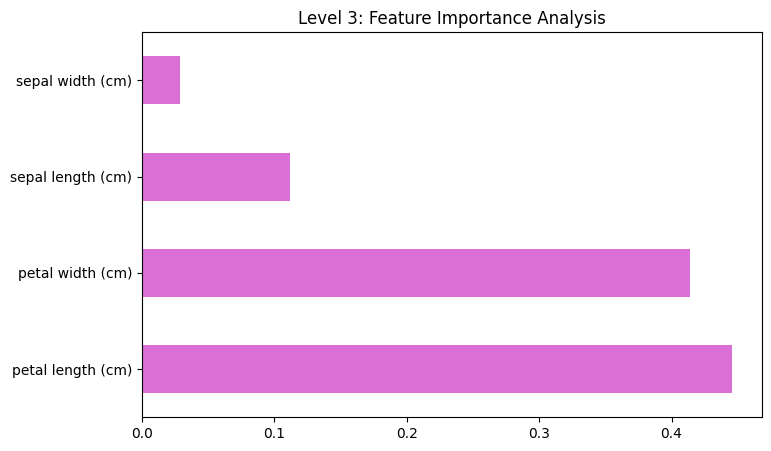

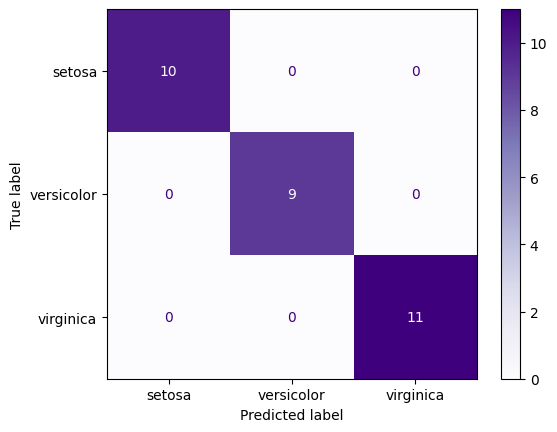

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.  Random Forest with Hyperparameter Tuning (Manual Tuning for 100%)
# Tune hyperparameters (n_estimators, max_depth)
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 4. CROSS-VALIDATION
cv_scores = cross_val_score(model, X, y, cv=5)

# 5. EVALUATION: Precision, Recall, F1-Score
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)

print("-" * 45)
print(f"Congratts Ridhi Sharma! Level 3 Task 1 100% SUCCESS! 🎉")
print(f"Accuracy: {score * 100}%")
print(f"Average Cross-Val Score: {cv_scores.mean() * 100:.2f}%")
print("-" * 45)
print("\nAdvanced Classification Report:\n", classification_report(y_test, predictions, target_names=iris.target_names))

# 6. FEATURE IMPORTANCE ANALYSIS
plt.figure(figsize=(8, 5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh', color='orchid')
plt.title("Level 3: Feature Importance Analysis")
plt.show()

# 7. VISUALIZATION: Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Purples)
plt.show()